In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os

In [2]:
customer = pd.read_csv(r"E:\New folder\AnalytixLabs\Python\case study\Python Foundation Case Study 2 - Credit Card Case Study\Customer Acqusition.csv")

In [3]:
spend = pd.read_csv(r"E:\New folder\AnalytixLabs\Python\case study\Python Foundation Case Study 2 - Credit Card Case Study\spend.csv")

In [4]:
repay = pd.read_csv(r"E:\New folder\AnalytixLabs\Python\case study\Python Foundation Case Study 2 - Credit Card Case Study\Repayment.csv")

In [5]:
customer.head()

,No,Customer,Age,City,Product,Limit,Company,Segment
0,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed
1,2,A2,71,CALCUTTA,Silver,100000.0,C2,Salaried_MNC
2,3,A3,34,COCHIN,Platimum,10000.0,C3,Salaried_Pvt
3,4,A4,47,BOMBAY,Platimum,10001.0,C4,Govt
4,5,A5,56,BANGALORE,Platimum,10002.0,C5,Normal Salary


In [11]:
customer.dtypes

No            int64
Customer     object
Age           int64
City         object
Product      object
Limit       float64
Company      object
Segment      object
dtype: object

In [13]:
customer.isnull().sum()

No          0
Customer    0
Age         0
City        0
Product     0
Limit       0
Company     0
Segment     0
dtype: int64

In [7]:
spend.head()

,Sl No:,Customer,Month,Type,Amount
0,1,A1,12-Jan-04,JEWELLERY,485470.80
1,2,A1,3-Jan-04,PETRO,410556.13
2,3,A1,15-Jan-04,CLOTHES,23740.46
3,4,A1,25-Jan-04,FOOD,484342.47
4,5,A1,17-Jan-05,CAMERA,369694.07


In [16]:
spend.dtypes

Sl No:        int64
Customer     object
Month        object
Type         object
Amount      float64
dtype: object

In [15]:
spend.isnull().sum()

Sl No:      0
Customer    0
Month       0
Type        0
Amount      0
dtype: int64

In [18]:
repay.head()

,SL No:,Customer,Month,Amount,Unnamed: 4
0,NaN,A1,12-Jan-04,495414.75,NaN
1,2.0,A1,3-Jan-04,245899.02,NaN
2,3.0,A1,15-Jan-04,259490.06,NaN
3,4.0,A1,25-Jan-04,437555.12,NaN
4,5.0,A1,17-Jan-05,165972.88,NaN


In [19]:
repay.dtypes

SL No:        float64
Customer       object
Month          object
Amount        float64
Unnamed: 4    float64
dtype: object

In [20]:
repay.isnull().sum()

SL No:          24
Customer        23
Month           23
Amount          23
Unnamed: 4    1523
dtype: int64

In [21]:
repay.drop(columns='Unnamed: 4',inplace=True)

In [22]:
repay.head()

,SL No:,Customer,Month,Amount
0,NaN,A1,12-Jan-04,495414.75
1,2.0,A1,3-Jan-04,245899.02
2,3.0,A1,15-Jan-04,259490.06
3,4.0,A1,25-Jan-04,437555.12
4,5.0,A1,17-Jan-05,165972.88


In [23]:
repay.dropna(inplace=True)

In [24]:
repay.isnull().sum()

SL No:      0
Customer    0
Month       0
Amount      0
dtype: int64

In [25]:
repay

,SL No:,Customer,Month,Amount
1,2.0,A1,3-Jan-04,245899.02
2,3.0,A1,15-Jan-04,259490.06
3,4.0,A1,25-Jan-04,437555.12
4,5.0,A1,17-Jan-05,165972.88
5,6.0,A1,23-Feb-05,365366.62
...,...,...,...,...
1495,1496.0,A67,9-May-05,55638.77
1496,1497.0,A68,10-May-06,319836.49
1497,1498.0,A69,11-Jul-06,247628.45
1498,1499.0,A70,12-Aug-05,454016.51


### 1. In the above dataset,

#### a. In case age is less than 18, replace it with mean of age values.

In [26]:
mean_real = customer["Age"].mean()

In [27]:
mean_real

46.49

In [28]:
customer.loc[customer["Age"] < 18,"Age"] = customer["Age"].mean()

In [29]:
mean_new = customer["Age"].mean()

In [30]:
mean_new

48.39940000000001

#### b. In case spend amount is more than the limit, replace it with 50% of that customer’s limit. 
#### (customer’s limit provided in acquisition table is the per transaction limit on his card)

In [31]:
customer.head()

,No,Customer,Age,City,Product,Limit,Company,Segment
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
1,2,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC
2,3,A3,34.0,COCHIN,Platimum,10000.0,C3,Salaried_Pvt
3,4,A4,47.0,BOMBAY,Platimum,10001.0,C4,Govt
4,5,A5,56.0,BANGALORE,Platimum,10002.0,C5,Normal Salary


In [32]:
spend.head()

,Sl No:,Customer,Month,Type,Amount
0,1,A1,12-Jan-04,JEWELLERY,485470.80
1,2,A1,3-Jan-04,PETRO,410556.13
2,3,A1,15-Jan-04,CLOTHES,23740.46
3,4,A1,25-Jan-04,FOOD,484342.47
4,5,A1,17-Jan-05,CAMERA,369694.07


In [33]:
# inner join on 'Customer'

customer_spend = pd.merge(left=customer,right=spend,on="Customer",how="inner")
customer_spend.head()

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.80
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2,3-Jan-04,PETRO,410556.13
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3,15-Jan-04,CLOTHES,23740.46
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,4,25-Jan-04,FOOD,484342.47
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,5,17-Jan-05,CAMERA,369694.07


In [34]:
# finding customers who spend more than their limit

customer_spend[customer_spend["Amount"] > customer_spend['Limit']]

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount
18,2,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,104,3-Jan-04,RENTAL,199554.72
19,2,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,118,28-Feb-05,TRAIN TICKET,376887.49
20,2,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,132,6-Apr-04,BUS TICKET,439648.53
21,2,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,146,23-Nov-04,PETRO,384078.73
22,2,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,160,3-Sep-05,JEWELLERY,117089.16
...,...,...,...,...,...,...,...,...,...,...,...,...
1486,87,A87,27.0,CALCUTTA,Silver,100003.0,C10,Govt,89,30-Mar-06,RENTAL,483886.62
1496,97,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt,99,12-Jan-04,AUTO,139018.26
1497,98,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary,100,3-Jan-04,SHOPPING,284521.06
1498,99,A99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed,101,15-Jan-04,AIR TICKET,90184.22


In [35]:
# replacing with 50% of that customer’s limit

customer_spend.loc[customer_spend["Amount"] > customer_spend["Limit"],"Amount"] = (50 * customer_spend["Limit"]).div(100)

In [36]:
customer_spend.head()

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.80
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2,3-Jan-04,PETRO,410556.13
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3,15-Jan-04,CLOTHES,23740.46
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,4,25-Jan-04,FOOD,484342.47
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,5,17-Jan-05,CAMERA,369694.07


#### c. Incase the repayment amount is more than the limit, replace the repayment with the limit.

In [37]:
repay.head()

,SL No:,Customer,Month,Amount
1,2.0,A1,3-Jan-04,245899.02
2,3.0,A1,15-Jan-04,259490.06
3,4.0,A1,25-Jan-04,437555.12
4,5.0,A1,17-Jan-05,165972.88
5,6.0,A1,23-Feb-05,365366.62


In [38]:
# inner join on 'customer'

customer_repay = pd.merge(left=repay,right=customer,on="Customer",how="inner")

In [39]:
customer_repay

,SL No:,Customer,Month,Amount,No,Age,City,Product,Limit,Company,Segment
0,2.0,A1,3-Jan-04,245899.02,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
1,3.0,A1,15-Jan-04,259490.06,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
2,4.0,A1,25-Jan-04,437555.12,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
3,5.0,A1,17-Jan-05,165972.88,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
4,6.0,A1,23-Feb-05,365366.62,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
...,...,...,...,...,...,...,...,...,...,...,...
1494,277.0,A7,22-Nov-05,55108.71,7,26.0,COCHIN,Silver,100001.0,C7,Salaried_MNC
1495,295.0,A7,3-Dec-05,429700.12,7,26.0,COCHIN,Silver,100001.0,C7,Salaried_MNC
1496,313.0,A7,23-Feb-05,344628.72,7,26.0,COCHIN,Silver,100001.0,C7,Salaried_MNC
1497,331.0,A7,31-Mar-06,336264.37,7,26.0,COCHIN,Silver,100001.0,C7,Salaried_MNC


In [41]:
# finding customers with repayment more than limit

customer_repay[customer_repay["Amount"] > customer_repay["Limit"]]

,SL No:,Customer,Month,Amount,No,Age,City,Product,Limit,Company,Segment
17,8.0,A8,5-Feb-04,156913.59,8,67.0,PATNA,Silver,100002.0,C8,Salaried_Pvt
18,110.0,A8,12-Jan-04,350999.98,8,67.0,PATNA,Silver,100002.0,C8,Salaried_Pvt
19,124.0,A8,31-Mar-06,155642.95,8,67.0,PATNA,Silver,100002.0,C8,Salaried_Pvt
20,138.0,A8,9-May-05,145457.38,8,67.0,PATNA,Silver,100002.0,C8,Salaried_Pvt
21,152.0,A8,8-May-06,361184.89,8,67.0,PATNA,Silver,100002.0,C8,Salaried_Pvt
...,...,...,...,...,...,...,...,...,...,...,...
1493,259.0,A7,6-May-06,400375.97,7,26.0,COCHIN,Silver,100001.0,C7,Salaried_MNC
1495,295.0,A7,3-Dec-05,429700.12,7,26.0,COCHIN,Silver,100001.0,C7,Salaried_MNC
1496,313.0,A7,23-Feb-05,344628.72,7,26.0,COCHIN,Silver,100001.0,C7,Salaried_MNC
1497,331.0,A7,31-Mar-06,336264.37,7,26.0,COCHIN,Silver,100001.0,C7,Salaried_MNC


In [42]:
# replacing with limit

customer_repay.loc[customer_repay["Amount"] > customer_repay["Limit"],"Amount"] = customer_repay["Limit"]

In [43]:
customer_repay

,SL No:,Customer,Month,Amount,No,Age,City,Product,Limit,Company,Segment
0,2.0,A1,3-Jan-04,245899.02,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
1,3.0,A1,15-Jan-04,259490.06,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
2,4.0,A1,25-Jan-04,437555.12,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
3,5.0,A1,17-Jan-05,165972.88,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
4,6.0,A1,23-Feb-05,365366.62,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
...,...,...,...,...,...,...,...,...,...,...,...
1494,277.0,A7,22-Nov-05,55108.71,7,26.0,COCHIN,Silver,100001.0,C7,Salaried_MNC
1495,295.0,A7,3-Dec-05,100001.00,7,26.0,COCHIN,Silver,100001.0,C7,Salaried_MNC
1496,313.0,A7,23-Feb-05,100001.00,7,26.0,COCHIN,Silver,100001.0,C7,Salaried_MNC
1497,331.0,A7,31-Mar-06,100001.00,7,26.0,COCHIN,Silver,100001.0,C7,Salaried_MNC


### 2. From the above dataset create the following summaries:

#### a. How many distinct customers exist?

In [44]:
distinct_customers = customer["Customer"].nunique()

In [45]:
distinct_customers

100

#### b. How many distinct categories exist?

In [46]:
customer["Segment"].value_counts()

Govt             29
Self Employed    23
Normal Salary    22
Salaried_MNC     13
Salaried_Pvt     13
Name: Segment, dtype: int64

In [47]:
## we have 5 distinct categories

#### c. What is the average monthly spend by customers?

In [48]:
spend.head()

,Sl No:,Customer,Month,Type,Amount
0,1,A1,12-Jan-04,JEWELLERY,485470.80
1,2,A1,3-Jan-04,PETRO,410556.13
2,3,A1,15-Jan-04,CLOTHES,23740.46
3,4,A1,25-Jan-04,FOOD,484342.47
4,5,A1,17-Jan-05,CAMERA,369694.07


In [49]:
# convert month to datetime

spend['Month'] = pd.to_datetime(spend['Month'])

In [50]:
spend['Month'].dtypes

dtype('<M8[ns]')

In [51]:
spend.head()

,Sl No:,Customer,Month,Type,Amount
0,1,A1,2004-01-12,JEWELLERY,485470.80
1,2,A1,2004-01-03,PETRO,410556.13
2,3,A1,2004-01-15,CLOTHES,23740.46
3,4,A1,2004-01-25,FOOD,484342.47
4,5,A1,2005-01-17,CAMERA,369694.07


In [52]:
# splitting month and year

spend['Months'] = spend['Month'].apply(lambda x:pd.Timestamp.strftime(x,format="%B"))
spend['Year'] = spend['Month'].apply(lambda x:pd.Timestamp.strftime(x,format="%Y"))

In [53]:
spend

,Sl No:,Customer,Month,Type,Amount,Months,Year
0,1,A1,2004-01-12,JEWELLERY,485470.80,January,2004
1,2,A1,2004-01-03,PETRO,410556.13,January,2004
2,3,A1,2004-01-15,CLOTHES,23740.46,January,2004
3,4,A1,2004-01-25,FOOD,484342.47,January,2004
4,5,A1,2005-01-17,CAMERA,369694.07,January,2005
...,...,...,...,...,...,...,...
1495,1496,A67,2006-02-04,BUS TICKET,356872.73,February,2006
1496,1497,A68,2006-03-25,BUS TICKET,204971.10,March,2006
1497,1498,A69,2006-03-31,BUS TICKET,50449.44,March,2006
1498,1499,A70,2006-03-23,BUS TICKET,80593.94,March,2006


In [54]:
# grouping by year and month with average

spend_new= round(spend.groupby(['Year','Months']).mean(),2)

In [55]:
spend_new

Sl No:     Amount
Year Months                      
2004 April      730.50  235272.04
     February   749.50  221215.27
     January    751.62  251712.07
     March      725.50  232146.12
     May        733.50  217539.24
     November   745.50  270486.40
     September  741.50  310923.38
2005 April      730.00  252181.33
     August     749.50  233734.63
     December   762.50  147503.06
     February   750.67  229802.28
     January    746.50  292741.37
     July       757.50  229116.66
     June       755.50  262688.11
     May        747.30  245696.52
     November   749.50  286143.32
     October    760.50  194568.64
     September  759.50  188666.20
2006 April      744.41  232468.97
     August     770.50  240699.72
     December   774.50  270470.98
     February   757.83  253858.26
     January    763.50  282058.01
     July       754.50  287505.10
     June       768.50  177252.39
     March      750.90  247166.08
     May        744.25  236162.74
     November   758.50  182841.29
     October    772.50  236136.34
     September  771.50  158520.09

#### d. What is the average monthly repayment by customers?

In [56]:
repay.dtypes

SL No:      float64
Customer     object
Month        object
Amount      float64
dtype: object

In [57]:
repay["Month"] = pd.to_datetime(repay["Month"])

In [58]:
repay["Month"].dtypes

dtype('<M8[ns]')

In [59]:
# splitting month and year from date

repay['Months'] = repay['Month'].apply(lambda x:pd.Timestamp.strftime(x,format="%B"))
repay['Year'] = repay['Month'].apply(lambda x:pd.Timestamp.strftime(x,format="%Y"))

In [60]:
repay

,SL No:,Customer,Month,Amount,Months,Year
1,2.0,A1,2004-01-03,245899.02,January,2004
2,3.0,A1,2004-01-15,259490.06,January,2004
3,4.0,A1,2004-01-25,437555.12,January,2004
4,5.0,A1,2005-01-17,165972.88,January,2005
5,6.0,A1,2005-02-23,365366.62,February,2005
...,...,...,...,...,...,...
1495,1496.0,A67,2005-05-09,55638.77,May,2005
1496,1497.0,A68,2006-05-10,319836.49,May,2006
1497,1498.0,A69,2006-07-11,247628.45,July,2006
1498,1499.0,A70,2005-08-12,454016.51,August,2005


In [61]:
repay_new= round(repay.groupby(['Year','Months']).mean(),2)

In [62]:
repay_new

SL No:     Amount
Year Months                      
2004 April      805.07  259141.68
     February   764.33  256702.63
     January    746.66  242586.69
     March      800.07  252585.28
     May        760.80  226162.72
     November   744.93  209592.24
     September  788.38  184487.85
2005 April      804.57  212688.63
     August     748.05  264430.92
     December   710.92  320379.34
     February   765.50  238829.27
     January    761.33  240548.10
     July       705.92  239871.48
     June       703.92  210199.82
     May        738.08  263207.37
     November   733.50  256695.12
     October    708.92  219849.96
     September  707.92  247700.17
2006 April      763.03  275472.25
     August     718.92  224143.99
     December   722.92  252736.57
     February   751.97  284489.57
     January    711.92  293475.39
     July       750.95  257936.38
     June       716.92  251990.45
     March      757.00  240851.27
     May        757.20  256920.88
     November   733.59  199399.20
     October    720.92  260765.48
     September  719.92  262533.88

#### e. If the monthly rate of interest is 2.9%, what is the profit for the bank for each month? 
####     (Profit is defined as interest earned on Monthly Profit. Monthly Profit = Monthly repayment 
####     –  Monthly spend. Interest is earned only on positive profits and not on negative amounts)

In [63]:
# merging all dataframes

customerAll = pd.merge(left=customer_spend,right=repay,on="Customer",how="inner")

In [64]:
customerAll

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month_x,Type,Amount_x,SL No:,Month_y,Amount_y,Months,Year
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.80,2.0,2004-01-03,245899.02,January,2004
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.80,3.0,2004-01-15,259490.06,January,2004
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.80,4.0,2004-01-25,437555.12,January,2004
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.80,5.0,2005-01-17,165972.88,January,2005
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.80,6.0,2005-02-23,365366.62,February,2005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37261,96,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,98,25-Jan-04,BIKE,54729.66,98.0,2004-01-25,310992.30,January,2004
37262,97,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt,99,12-Jan-04,AUTO,5000.00,99.0,2004-01-12,121874.90,January,2004
37263,98,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary,100,3-Jan-04,SHOPPING,5000.50,100.0,2004-01-03,337815.57,January,2004
37264,99,A99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed,101,15-Jan-04,AIR TICKET,5001.00,101.0,2004-01-15,25682.73,January,2004


In [65]:
#reanming amount_x as spend_amount and amount_y as repay_amount

customerAll.rename(columns={"Amount_x":"Spend_Amount","Amount_y":"Repay_Amount"},inplace=True)

In [66]:
customerAll.head()

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month_x,Type,Spend_Amount,SL No:,Month_y,Repay_Amount,Months,Year
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.8,2.0,2004-01-03,245899.02,January,2004
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.8,3.0,2004-01-15,259490.06,January,2004
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.8,4.0,2004-01-25,437555.12,January,2004
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.8,5.0,2005-01-17,165972.88,January,2005
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.8,6.0,2005-02-23,365366.62,February,2005


In [68]:
# getting spend and repay data on a monthly and yearly basis

cust_data = customerAll.groupby(["Year","Months"])['Spend_Amount','Repay_Amount'].sum()

<ipython-input-68-c7e51838bb3c>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  cust_data = customerAll.groupby(["Year","Months"])['Spend_Amount','Repay_Amount'].sum()


In [69]:
cust_data

Spend_Amount  Repay_Amount
Year Months                               
2004 April      1.194516e+08  2.285403e+08
     February   7.613922e+07  1.602419e+08
     January    1.083214e+09  1.690292e+09
     March      5.594171e+07  8.974470e+07
     May        8.800456e+07  1.411594e+08
     November   5.504612e+07  7.860290e+07
     September  5.144278e+07  8.016122e+07
2005 April      9.366405e+07  1.747894e+08
     August     1.361400e+08  2.477449e+08
     December   4.348638e+07  9.944533e+07
     February   5.890557e+08  9.416163e+08
     January    1.324129e+08  1.810333e+08
     July       3.995653e+07  7.997268e+07
     June       1.174019e+08  2.213774e+08
     May        7.149030e+08  1.099197e+09
     November   1.532278e+08  2.763119e+08
     October    3.140993e+07  6.027830e+07
     September  3.195551e+07  7.530449e+07
2006 April      3.229722e+08  6.093666e+08
     August     5.849630e+07  7.167032e+07
     December   4.585222e+07  7.087702e+07
     February   1.654843e+08  2.903280e+08
     January    5.127574e+07  8.974491e+07
     July       1.444093e+08  2.245720e+08
     June       5.302118e+07  6.914431e+07
     March      7.393854e+08  1.115725e+09
     May        3.297954e+08  5.434823e+08
     November   1.124836e+08  1.355832e+08
     October    5.285823e+07  7.890924e+07
     September  5.395681e+07  8.083199e+07

In [70]:
# profit = Monthly repayment – Monthly spend.

cust_data['Monthly Profit'] = cust_data['Repay_Amount'] - cust_data['Spend_Amount']

In [71]:
cust_data

Spend_Amount  Repay_Amount  Monthly Profit
Year Months                                               
2004 April      1.194516e+08  2.285403e+08    1.090887e+08
     February   7.613922e+07  1.602419e+08    8.410268e+07
     January    1.083214e+09  1.690292e+09    6.070777e+08
     March      5.594171e+07  8.974470e+07    3.380298e+07
     May        8.800456e+07  1.411594e+08    5.315485e+07
     November   5.504612e+07  7.860290e+07    2.355678e+07
     September  5.144278e+07  8.016122e+07    2.871844e+07
2005 April      9.366405e+07  1.747894e+08    8.112539e+07
     August     1.361400e+08  2.477449e+08    1.116049e+08
     December   4.348638e+07  9.944533e+07    5.595895e+07
     February   5.890557e+08  9.416163e+08    3.525606e+08
     January    1.324129e+08  1.810333e+08    4.862042e+07
     July       3.995653e+07  7.997268e+07    4.001615e+07
     June       1.174019e+08  2.213774e+08    1.039755e+08
     May        7.149030e+08  1.099197e+09    3.842944e+08
     November   1.532278e+08  2.763119e+08    1.230841e+08
     October    3.140993e+07  6.027830e+07    2.886837e+07
     September  3.195551e+07  7.530449e+07    4.334898e+07
2006 April      3.229722e+08  6.093666e+08    2.863944e+08
     August     5.849630e+07  7.167032e+07    1.317402e+07
     December   4.585222e+07  7.087702e+07    2.502480e+07
     February   1.654843e+08  2.903280e+08    1.248436e+08
     January    5.127574e+07  8.974491e+07    3.846917e+07
     July       1.444093e+08  2.245720e+08    8.016271e+07
     June       5.302118e+07  6.914431e+07    1.612313e+07
     March      7.393854e+08  1.115725e+09    3.763400e+08
     May        3.297954e+08  5.434823e+08    2.136869e+08
     November   1.124836e+08  1.355832e+08    2.309955e+07
     October    5.285823e+07  7.890924e+07    2.605102e+07
     September  5.395681e+07  8.083199e+07    2.687518e+07

In [72]:
# checking negative profit

(cust_data['Monthly Profit']<0).sum()

0

In [73]:
cust_data['Interest Earned'] = (2.9* cust_data ['Monthly Profit'])/100

In [74]:
cust_data

Spend_Amount  Repay_Amount  Monthly Profit  Interest Earned
Year Months                                                                
2004 April      1.194516e+08  2.285403e+08    1.090887e+08     3.163572e+06
     February   7.613922e+07  1.602419e+08    8.410268e+07     2.438978e+06
     January    1.083214e+09  1.690292e+09    6.070777e+08     1.760525e+07
     March      5.594171e+07  8.974470e+07    3.380298e+07     9.802865e+05
     May        8.800456e+07  1.411594e+08    5.315485e+07     1.541491e+06
     November   5.504612e+07  7.860290e+07    2.355678e+07     6.831466e+05
     September  5.144278e+07  8.016122e+07    2.871844e+07     8.328349e+05
2005 April      9.366405e+07  1.747894e+08    8.112539e+07     2.352636e+06
     August     1.361400e+08  2.477449e+08    1.116049e+08     3.236542e+06
     December   4.348638e+07  9.944533e+07    5.595895e+07     1.622810e+06
     February   5.890557e+08  9.416163e+08    3.525606e+08     1.022426e+07
     January    1.324129e+08  1.810333e+08    4.862042e+07     1.409992e+06
     July       3.995653e+07  7.997268e+07    4.001615e+07     1.160468e+06
     June       1.174019e+08  2.213774e+08    1.039755e+08     3.015290e+06
     May        7.149030e+08  1.099197e+09    3.842944e+08     1.114454e+07
     November   1.532278e+08  2.763119e+08    1.230841e+08     3.569438e+06
     October    3.140993e+07  6.027830e+07    2.886837e+07     8.371827e+05
     September  3.195551e+07  7.530449e+07    4.334898e+07     1.257121e+06
2006 April      3.229722e+08  6.093666e+08    2.863944e+08     8.305437e+06
     August     5.849630e+07  7.167032e+07    1.317402e+07     3.820465e+05
     December   4.585222e+07  7.087702e+07    2.502480e+07     7.257193e+05
     February   1.654843e+08  2.903280e+08    1.248436e+08     3.620465e+06
     January    5.127574e+07  8.974491e+07    3.846917e+07     1.115606e+06
     July       1.444093e+08  2.245720e+08    8.016271e+07     2.324719e+06
     June       5.302118e+07  6.914431e+07    1.612313e+07     4.675707e+05
     March      7.393854e+08  1.115725e+09    3.763400e+08     1.091386e+07
     May        3.297954e+08  5.434823e+08    2.136869e+08     6.196920e+06
     November   1.124836e+08  1.355832e+08    2.309955e+07     6.698869e+05
     October    5.285823e+07  7.890924e+07    2.605102e+07     7.554795e+05
     September  5.395681e+07  8.083199e+07    2.687518e+07     7.793803e+05

#### f. What are the top 5 product types?

In [75]:
spend['Type'].value_counts().head()

PETRO           200
FOOD            160
CAMERA          160
AIR TICKET      147
TRAIN TICKET    132
Name: Type, dtype: int64

#### g. Which city is having maximum spend?

In [76]:
customer_spend.groupby("City")["Amount"].sum().sort_values(ascending=False)

City
COCHIN        45963513.50
CALCUTTA      41108132.30
BANGALORE     40461647.02
BOMBAY        28603127.38
CHENNAI       22128635.65
TRIVANDRUM    15337155.87
PATNA         15260586.97
DELHI         10918286.54
Name: Amount, dtype: float64

In [77]:
## Cochin has the maximum spend

#### h. Which age group is spending more money?

In [78]:
customer_spend

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.80
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2,3-Jan-04,PETRO,410556.13
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3,15-Jan-04,CLOTHES,23740.46
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,4,25-Jan-04,FOOD,484342.47
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,5,17-Jan-05,CAMERA,369694.07
...,...,...,...,...,...,...,...,...,...,...,...,...
1495,96,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,98,25-Jan-04,BIKE,54729.66
1496,97,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt,99,12-Jan-04,AUTO,5000.00
1497,98,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary,100,3-Jan-04,SHOPPING,5000.50
1498,99,A99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed,101,15-Jan-04,AIR TICKET,5001.00


In [79]:
customer_spend['Age'].max()

79.0

In [80]:
customer_spend['Age'].min()

19.0

In [82]:
# creating a column age group

customer_spend["Age Group"] =  pd.cut(customer_spend["Age"],
                                      bins = np.arange(18,88,8),
                                      labels = ["18-26","26-34", "34-42" ,"42-50" ,"50-58","58-66","66-74","74-82"],
                                      include_lowest = True
                                     )

In [83]:
customer_spend

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount,Age Group
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.80,74-82
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2,3-Jan-04,PETRO,410556.13,74-82
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3,15-Jan-04,CLOTHES,23740.46,74-82
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,4,25-Jan-04,FOOD,484342.47,74-82
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,5,17-Jan-05,CAMERA,369694.07,74-82
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,96,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,98,25-Jan-04,BIKE,54729.66,50-58
1496,97,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt,99,12-Jan-04,AUTO,5000.00,50-58
1497,98,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary,100,3-Jan-04,SHOPPING,5000.50,50-58
1498,99,A99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed,101,15-Jan-04,AIR TICKET,5001.00,34-42


In [84]:
customer_spend.groupby("Age Group")['Amount'].sum().sort_values(ascending=False)

Age Group
42-50    53242390.70
34-42    38037826.50
26-34    30553459.81
18-26    25233896.65
50-58    22454066.68
74-82    19770884.32
66-74    17705877.44
58-66    12782683.13
Name: Amount, dtype: float64

In [85]:
## age group 42-50 spend the most

#### i. Who are the top 10 customers in terms of repayment?

In [86]:
# sorting in descending order

customer_repay.groupby("Customer")[["Amount"]].sum().sort_values(by="Amount",ascending=False).head(10)

,Amount
Customer,
A61,10539142.91
A60,9876290.74
A13,9572000.66
A43,8489871.46
A45,8448334.87
A12,8334760.16
A14,7943268.63
A44,7744730.12
A39,7622483.30


### 3. Calculate the city wise spend on each product on yearly basis. Also include a graphical representation for the same.

In [87]:
customer_spend.head()

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount,Age Group
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.80,74-82
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2,3-Jan-04,PETRO,410556.13,74-82
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3,15-Jan-04,CLOTHES,23740.46,74-82
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,4,25-Jan-04,FOOD,484342.47,74-82
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,5,17-Jan-05,CAMERA,369694.07,74-82


In [88]:
# month to datetime

customer_spend["Month"] = pd.to_datetime(customer_spend["Month"])

In [89]:
# since we need yearly spend,creating a new year column and extracting the year 

customer_spend['Year'] = customer_spend['Month'].apply(lambda x:pd.Timestamp.strftime(x,format="%Y"))

In [90]:
customer_spend.head(10)

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount,Age Group,Year
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,2004-01-12,JEWELLERY,485470.80,74-82,2004
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2,2004-01-03,PETRO,410556.13,74-82,2004
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3,2004-01-15,CLOTHES,23740.46,74-82,2004
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,4,2004-01-25,FOOD,484342.47,74-82,2004
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,5,2005-01-17,CAMERA,369694.07,74-82,2005
5,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,6,2005-02-23,SANDALS,168285.60,74-82,2005
6,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,7,2005-02-01,CAR,23370.20,74-82,2005
7,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,103,2004-01-12,TRAIN TICKET,440563.22,74-82,2004
8,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,117,2004-02-05,BUS TICKET,52208.65,74-82,2004
9,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,131,2006-04-19,AIR TICKET,346925.68,74-82,2006


In [91]:
# we need a pivot table for better view

customer_spend_pivot = pd.pivot_table(data = customer_spend,
                                      index=["City","Year"],
                                      columns='Product',
                                      aggfunc="sum",
                                      values="Amount"
                                     )

In [92]:
customer_spend_pivot

Product                 Gold    Platimum      Silver
City       Year                                     
BANGALORE  2004   9289878.54  1112732.30  1291852.58
           2005  12892362.99   912284.97   830612.34
           2006  12030611.09   685831.27  1415480.94
BOMBAY     2004   6987853.53   897264.94   532089.03
           2005   8983018.28   711804.94   508988.54
           2006   7917144.31   972130.01  1092833.80
CALCUTTA   2004   7477140.98  2037690.30   500006.00
           2005  10303355.80  4434696.31   440147.06
           2006  11167532.77  3589606.66  1157956.42
CHENNAI    2004   1059618.50  3535652.38   282056.86
           2005   3740945.58  5053956.32   377184.49
           2006   2704288.62  5024923.40   350009.50
COCHIN     2004   7315850.15  3419904.07   814229.62
           2005  12110613.03  4960921.71   652269.38
           2006  10499142.38  4920592.29  1269990.87
DELHI      2004   2806495.00   283512.89   768172.30
           2005   1964845.27   494157.86   612311.21
           2006   2957103.32   176788.72   854899.97
PATNA      2004   2072567.90  1113069.60   756684.10
           2005   3252615.77  2883231.07   950094.19
           2006   2276181.69  1256137.65   700005.00
TRIVANDRUM 2004   2415102.84  2161676.67   209667.48
           2005   1240375.85  3601443.30   269912.99
           2006   2735710.87  2147403.75   555862.12

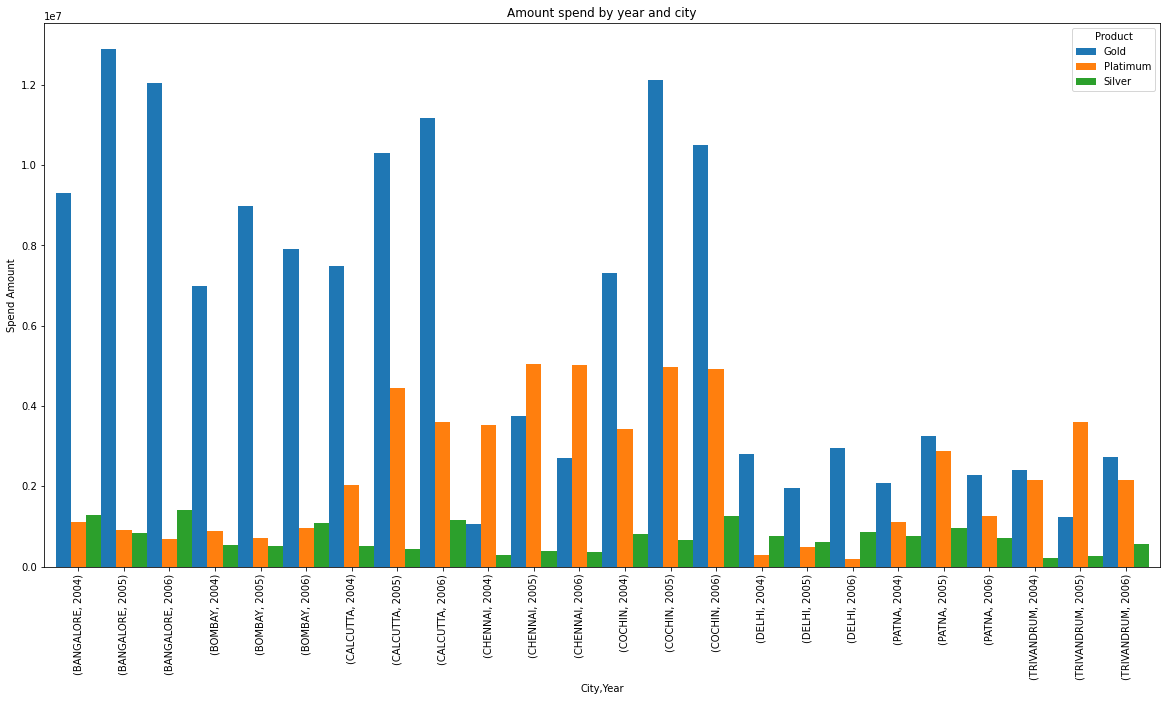

In [93]:
# grphical representation

customer_spend_pivot.plot(kind="bar",figsize=(20,10),width=1)
plt.ylabel("Spend Amount")
plt.title("Amount spend by year and city")
plt.show()

### 4. Create graphs for

#### a. Monthly comparison of total spends, city wise

In [94]:
customer_spend.head()

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount,Age Group,Year
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,2004-01-12,JEWELLERY,485470.80,74-82,2004
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2,2004-01-03,PETRO,410556.13,74-82,2004
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3,2004-01-15,CLOTHES,23740.46,74-82,2004
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,4,2004-01-25,FOOD,484342.47,74-82,2004
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,5,2005-01-17,CAMERA,369694.07,74-82,2005


In [95]:
# extracting month and creating a column

customer_spend['Monthly'] = customer_spend['Month'].apply(lambda x:pd.Timestamp.strftime(x,format="%B"))

In [96]:
customer_spend.head()

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount,Age Group,Year,Monthly
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,2004-01-12,JEWELLERY,485470.80,74-82,2004,January
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2,2004-01-03,PETRO,410556.13,74-82,2004,January
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3,2004-01-15,CLOTHES,23740.46,74-82,2004,January
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,4,2004-01-25,FOOD,484342.47,74-82,2004,January
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,5,2005-01-17,CAMERA,369694.07,74-82,2005,January


In [97]:
#grouping data based on "Monthly" and "City" columns

month_city = customer_spend.groupby(["Monthly","City"])[["Amount"]].sum().sort_index().reset_index()

In [98]:
# pivot table for better view

month_city =pd.pivot_table(data=customer_spend,values='Amount',index='City',columns='Monthly',aggfunc='sum')

In [99]:
month_city

Monthly,April,August,December,February,January,July,June,March,May,November,October,September
City,,,,,,,,,,,,
BANGALORE,4207980.48,695061.95,422167.24,6734494.76,9041796.84,2228217.69,1330685.90,5362903.07,6383115.13,2260603.07,1091602.61,703018.28
BOMBAY,1873785.01,1066744.75,140040.71,4276988.30,5948993.33,177726.32,1172594.97,5227850.50,3891945.60,2872049.40,676005.70,1278402.79
CALCUTTA,3457507.95,1548354.02,55001.50,8150545.61,9064864.90,2234573.27,2293045.81,4939040.04,5578246.87,2078880.93,196357.83,1511713.57
CHENNAI,2518656.99,305875.97,223628.27,4385815.95,4466961.36,693825.77,1244242.16,3183643.71,2856199.62,1347779.28,156247.17,745759.40
COCHIN,3882744.94,2317306.61,909533.05,5747886.38,11714373.54,1290897.30,2495745.07,5645146.53,6581085.69,3127999.60,868551.89,1382242.90
DELHI,777240.75,155402.16,842342.02,1494064.06,2714261.45,50001.50,511276.09,2267149.02,1600322.07,391610.96,64615.46,50001.00
PATNA,2338179.53,419383.64,50000.00,2353333.55,4916205.55,50000.00,746186.13,1437166.61,2136586.80,413677.87,329537.34,70329.95
TRIVANDRUM,1199293.45,453773.94,640922.26,2857123.89,3704336.99,260484.50,400336.83,2392316.51,2813534.48,143387.40,285581.92,186063.70


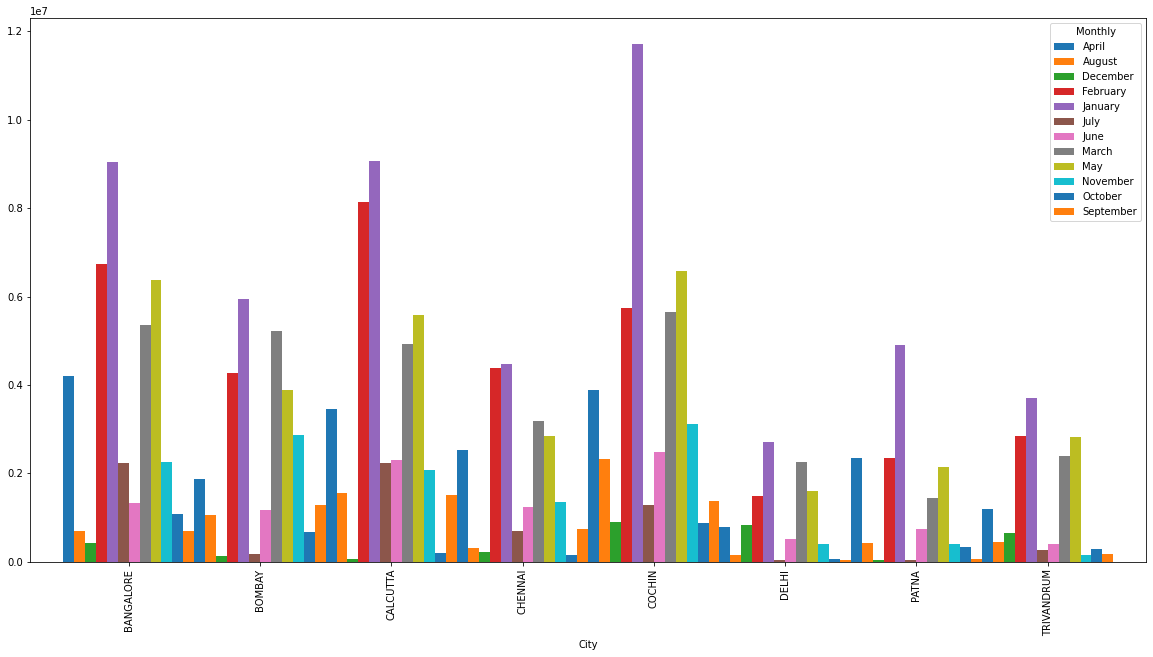

In [100]:
month_city.plot(kind="bar",figsize=(20,10),width=1)
plt.show()

#### b. Comparison of yearly spend on air tickets 

In [101]:
customer_spend.head()

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount,Age Group,Year,Monthly
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,2004-01-12,JEWELLERY,485470.80,74-82,2004,January
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2,2004-01-03,PETRO,410556.13,74-82,2004,January
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3,2004-01-15,CLOTHES,23740.46,74-82,2004,January
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,4,2004-01-25,FOOD,484342.47,74-82,2004,January
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,5,2005-01-17,CAMERA,369694.07,74-82,2005,January


In [102]:
spend_type = customer_spend.groupby(["Year","Type"])[["Amount"]].sum().reset_index()

In [103]:
spend_type

,Year,Type,Amount
0,2004,AIR TICKET,4357225.35
1,2004,AUTO,254745.28
2,2004,BIKE,476635.28
3,2004,BUS TICKET,5822074.21
4,2004,CAMERA,10122819.72
5,2004,CAR,2326442.62
6,2004,CLOTHES,2685429.91
7,2004,FOOD,7727298.46
8,2004,JEWELLERY,2579785.80
9,2004,MOVIE TICKET,1588392.99


In [104]:
air=spend_type.loc[spend_type["Type"]=="AIR TICKET"]

In [105]:
air

,Year,Type,Amount
0,2004,AIR TICKET,4357225.35
15,2005,AIR TICKET,10550152.21
30,2006,AIR TICKET,5248469.56


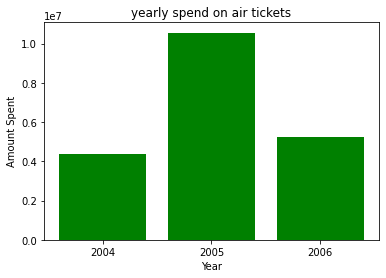

In [106]:
plt.bar(air["Year"],height=air["Amount"],color="green")
plt.xlabel("Year")
plt.ylabel("Amount Spent")
plt.title("yearly spend on air tickets")
plt.show()

#### c. Comparison of monthly spend for each product (look for any seasonality that exists in terms of spend)

In [107]:
customer_spend.head()

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount,Age Group,Year,Monthly
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,2004-01-12,JEWELLERY,485470.80,74-82,2004,January
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2,2004-01-03,PETRO,410556.13,74-82,2004,January
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3,2004-01-15,CLOTHES,23740.46,74-82,2004,January
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,4,2004-01-25,FOOD,484342.47,74-82,2004,January
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,5,2005-01-17,CAMERA,369694.07,74-82,2005,January


In [108]:
# pivot table for better view

product_data = pd.pivot_table(data=customer_spend,
                              index='Product',
                              columns='Monthly',
                              values='Amount',
                              aggfunc='sum'
                             )

In [109]:
product_data

Monthly,April,August,December,February,January,July,June,March,May,November,October,September
Product,,,,,,,,,,,,
Gold,13170572.59,4954030.42,2332940.96,24779179.55,32413831.83,5167416.37,6538862.64,19256972.48,21548169.76,9203267.46,3018223.38,3816887.62
Platimum,5182493.86,1714762.80,750156.19,9134054.58,14951578.51,1288156.26,2965712.71,7288837.68,8151926.49,2741618.42,550275.04,1667840.84
Silver,1902322.65,293109.82,200537.90,2087018.37,4206383.62,530153.72,689537.61,3909405.83,2140940.01,691102.63,100001.50,442803.13


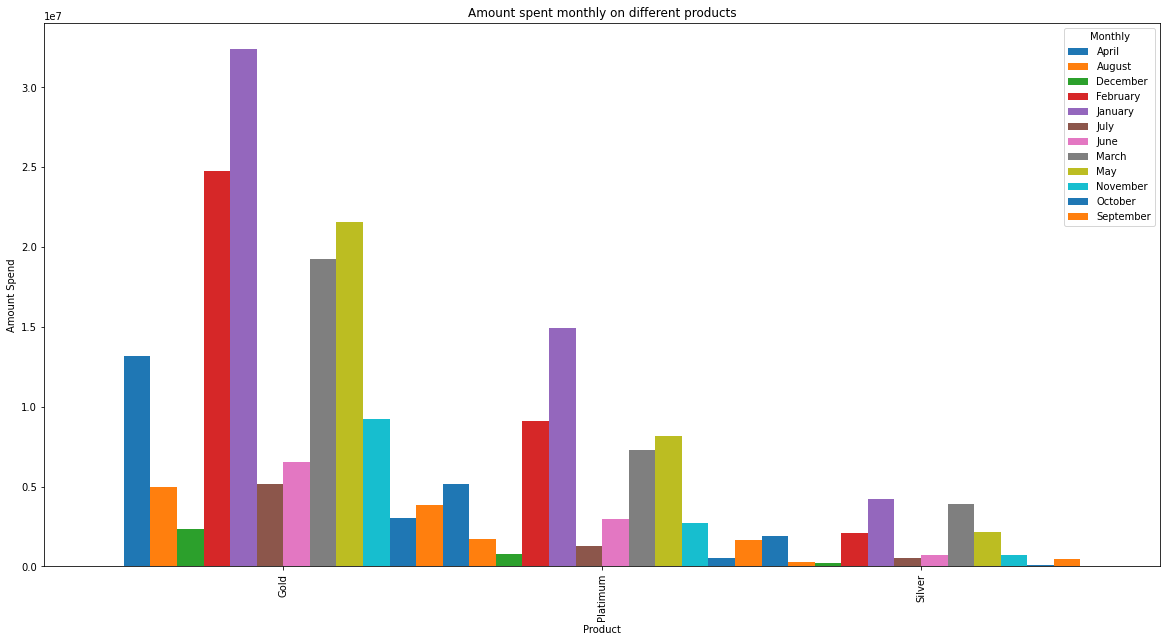

In [110]:
product_data.plot(kind="bar",figsize=(20,10),width=1)
plt.ylabel("Amount Spend")
plt.title("Amount spent monthly on different products")
plt.show()

### 5. Write user defined PYTHON function to perform the following analysis:

You need to find top 10 customers for each city in terms of their repayment amount by 
different products and by different time periods i.e. year or month. The user should be able 
to specify the product (Gold/Silver/Platinum) and time period (yearly or monthly) and the 
function should automatically take these inputs while identifying the top 10 customers.

In [111]:
customer_repay.head()

,SL No:,Customer,Month,Amount,No,Age,City,Product,Limit,Company,Segment
0,2.0,A1,3-Jan-04,245899.02,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
1,3.0,A1,15-Jan-04,259490.06,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
2,4.0,A1,25-Jan-04,437555.12,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
3,5.0,A1,17-Jan-05,165972.88,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
4,6.0,A1,23-Feb-05,365366.62,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed


In [112]:
customer_repay['Month'] = pd.to_datetime(customer_repay['Month'])

In [113]:
#creating new column "Monthly" and "Yearly" using  'Month' column

customer_repay['Monthly'] = customer_repay['Month'].apply(lambda x:pd.Timestamp.strftime(x,format="%B"))
customer_repay['Yearly'] = customer_repay['Month'].apply(lambda x:pd.Timestamp.strftime(x,format="%Y"))

In [114]:
customer_repay

,SL No:,Customer,Month,Amount,No,Age,City,Product,Limit,Company,Segment,Monthly,Yearly
0,2.0,A1,2004-01-03,245899.02,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,January,2004
1,3.0,A1,2004-01-15,259490.06,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,January,2004
2,4.0,A1,2004-01-25,437555.12,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,January,2004
3,5.0,A1,2005-01-17,165972.88,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,January,2005
4,6.0,A1,2005-02-23,365366.62,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,February,2005
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1494,277.0,A7,2005-11-22,55108.71,7,26.0,COCHIN,Silver,100001.0,C7,Salaried_MNC,November,2005
1495,295.0,A7,2005-12-03,100001.00,7,26.0,COCHIN,Silver,100001.0,C7,Salaried_MNC,December,2005
1496,313.0,A7,2005-02-23,100001.00,7,26.0,COCHIN,Silver,100001.0,C7,Salaried_MNC,February,2005
1497,331.0,A7,2006-03-31,100001.00,7,26.0,COCHIN,Silver,100001.0,C7,Salaried_MNC,March,2006


In [115]:
customer_repay['Product'].value_counts()

Gold        609
Platimum    570
Silver      320
Name: Product, dtype: int64

In [116]:
def analysis(product,timeperiod):
    print('Give the product name and timeperiod for which you want the data')
    if product.lower()=='gold' and timeperiod.lower()=='monthly':
        pivot = customer_repay.pivot_table(index=['Product','City','Customer'],columns='Monthly',aggfunc='sum',values='Amount')
        output = pivot.loc[('Gold',['BANGALORE','COCHIN','CALCUTTA','BOMBAY','CHENNAI','TRIVANDRUM','PATNA','DELHI']),:]
    elif product.lower()=='gold' and timeperiod.lower()=='yearly':
        pivot = customer_repay.pivot_table(index=['Product','City','Customer'],columns='Yearly',aggfunc='sum',values='Amount')
        output = pivot.loc[('Gold',['BANGALORE','COCHIN','CALCUTTA','BOMBAY','CHENNAI','TRIVANDRUM','PATNA','DELHI']),:]
    elif product.lower()=='silver' and timeperiod.lower()=='monthly':
        pivot = customer_repay.pivot_table(index=['Product','City','Customer'],columns='Monthly',aggfunc='sum',values='Amount')
        output = pivot.loc[('Silver',['BANGALORE','COCHIN','CALCUTTA','BOMBAY','CHENNAI','TRIVANDRUM','PATNA','DELHI']),:]
    elif product.lower()=='silver' and timeperiod.lower()=='yearly':
        pivot = customer_repay.pivot_table(index=['Product','City','Customer'],columns='Yearly',aggfunc='sum',values='Amount')
        output = pivot.loc[('Silver',['BANGALORE','COCHIN','CALCUTTA','BOMBAY','CHENNAI','TRIVANDRUM','PATNA','DELHI']),:]
    elif product.lower()=='platinum' and timeperiod.lower()=='monthly':
        pivot = customer_repay.pivot_table(index=['Product','City','Customer'],columns='Monthly',aggfunc='sum',values='Amount')
        output = pivot.loc[('Platimum',['BANGALORE','COCHIN','CALCUTTA','BOMBAY','CHENNAI','TRIVANDRUM','PATNA','DELHI']),:]
    elif product.lower()=='platinum' and timeperiod.lower()=='yearly':
        pivot = customer_repay.pivot_table(index=['Product','City','Customer'],columns='Yearly',aggfunc='sum',values='Amount')
        output = pivot.loc[('Platimum',['BANGALORE','COCHIN','CALCUTTA','BOMBAY','CHENNAI','TRIVANDRUM','PATNA','DELHI']),:]
    return output

In [117]:
analysis('PLATINUM','monthly')

Give the product name and timeperiod for which you want the data


Monthly                            April     August   December    February  \
Product  City       Customer                                                 
Platimum BANGALORE  A19         30000.00        NaN   10000.00    10000.00   
                    A37        255805.86  100003.00  100003.00   404735.41   
                    A5           7276.60        NaN        NaN    10002.00   
                    A52        200004.00  235509.11        NaN   234334.70   
         COCHIN     A21         40008.00   30006.00   10002.00    50010.00   
                    A3          20000.00        NaN        NaN    30000.00   
                    A35        200002.00  130191.67        NaN   300003.00   
                    A41        147383.00    6865.68        NaN   509624.20   
                    A50        100000.00  100000.00        NaN   229753.02   
                    A54       1025491.68        NaN  215719.14  1149119.64   
                    A83              NaN        NaN        NaN         NaN   
         CALCUTTA   A20         40004.00   10001.00        NaN    20002.00   
                    A34        100000.00  200000.00        NaN   198933.36   
                    A40              NaN  488742.81  169786.15   937643.24   
                    A49         30006.00   10002.00   10002.00    70014.00   
                    A69              NaN        NaN        NaN         NaN   
                    A98              NaN        NaN        NaN         NaN   
                    A99              NaN        NaN        NaN         NaN   
         BOMBAY     A33              NaN   10002.00        NaN    30006.00   
                    A36        511685.20  117379.12  100002.00   427759.59   
                    A4          10001.00        NaN   10001.00    20002.00   
                    A51        100001.00        NaN        NaN   206147.92   
                    A70              NaN   10001.00        NaN    10001.00   
                    A71              NaN        NaN        NaN    10002.00   
         CHENNAI    A38        369151.51        NaN  492660.82  1365681.76   
                    A47         50000.00        NaN        NaN    80000.00   
                    A56        770261.09        NaN  162103.09   413912.92   
         TRIVANDRUM A39        472407.74        NaN  278687.47  1212860.65   
                    A48         50005.00        NaN        NaN    70007.00   
                    A97              NaN        NaN        NaN         NaN   
         PATNA      A55        619774.41        NaN        NaN  1124130.33   
         DELHI      A53        300009.00   50308.75  100003.00   279929.09   

Monthly                          January       July       June       March  \
Product  City       Customer                                                 
Platimum BANGALORE  A19         50000.00   10000.00   10000.00    40000.00   
                    A37        500008.58        NaN  200006.00   200006.00   
                    A5          60012.00        NaN        NaN    30006.00   
                    A52        263853.18  100002.00        NaN   300006.00   
         COCHIN     A21         80016.00   10002.00   20004.00    30006.00   
                    A3          20000.00        NaN        NaN         NaN   
                    A35              NaN  200002.00        NaN   100001.00   
                    A41       2089998.54        NaN        NaN   499724.79   
                    A50        225086.07        NaN  100000.00   400000.00   
                    A54       1154398.99        NaN        NaN   100719.74   
                    A83              NaN        NaN        NaN    10002.00   
         CALCUTTA   A20         50005.00   30003.00        NaN    30003.00   
                    A34              NaN  148053.83  100000.00   128854.14   
                    A40       1749083.51  242107.49        NaN  1176947.70   
                    A49         50010.00   10002.00   30006.00    30006.00   
                    A